# Exercise 2: Image denoising

**Degree** Master Inter-Universitario de Data Science 

**Course** Machine Learning I

**Lecturer** Ignacio Heredia

---

**Objective**
Use the previous deep autoencoder to create an image denoising application.

**Duration**
20 min

---

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

**Load dataset**

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

# Create noisy version of the data

########################################
#                                      #
#       FILL THIS WITH CODE!           #
#                                      #
########################################

x_train_noisy = x_train + np.random.normal(loc=0.0, scale=0.5, size=x_train.shape)
x_test_noisy = x_test + np.random.normal(loc=0.0, scale=0.5, size=x_test.shape)

x_train_noisy = np.clip(x_train_noisy, 0, 1)
x_test_noisy = np.clip(x_test_noisy, 0, 1)

(60000, 784)
(10000, 784)


**Create the model**

In [4]:
########################################
#                                      #
#       FILL THIS WITH CODE!           #
#                                      #
########################################

input_img = Input(shape=(784,))
encoded = Dense(32, activation='relu')(input_img) # 32 neurons
decoded = Dense(784, activation='sigmoid')(encoded)


autoencoder = Model(input_img, decoded)
encoder = Model(input_img, encoded)

**Train the model**

In [31]:
########################################
#                                      #
#       FILL THIS WITH CODE!           #
#                                      #
########################################

autoencoder.compile(optimizer='adam', loss='mean_squared_error')

autoencoder.fit(x_train_noisy, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0278 - val_loss: 0.0234
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0216 - val_loss: 0.0264
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0208 - val_loss: 0.0270
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0205 - val_loss: 0.0255
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0203 - val_loss: 0.0242
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0202 - val_loss: 0.0231
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0202 - val_loss: 0.0214
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0201 - val_loss: 0.0209
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0201 - val_loss: 0.0195
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0201 - val_loss: 0.0185
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0200 - val_loss: 0.0178
Epoch 12/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

**Test the model**

In [32]:
########################################
#                                      #
#       FILL THIS WITH CODE!           #
#                                      #
########################################

encoded_imgs = encoder.predict(x_test_noisy)
decoded_imgs = autoencoder.predict(x_test_noisy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 208us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 269us/step


**Plot the results**

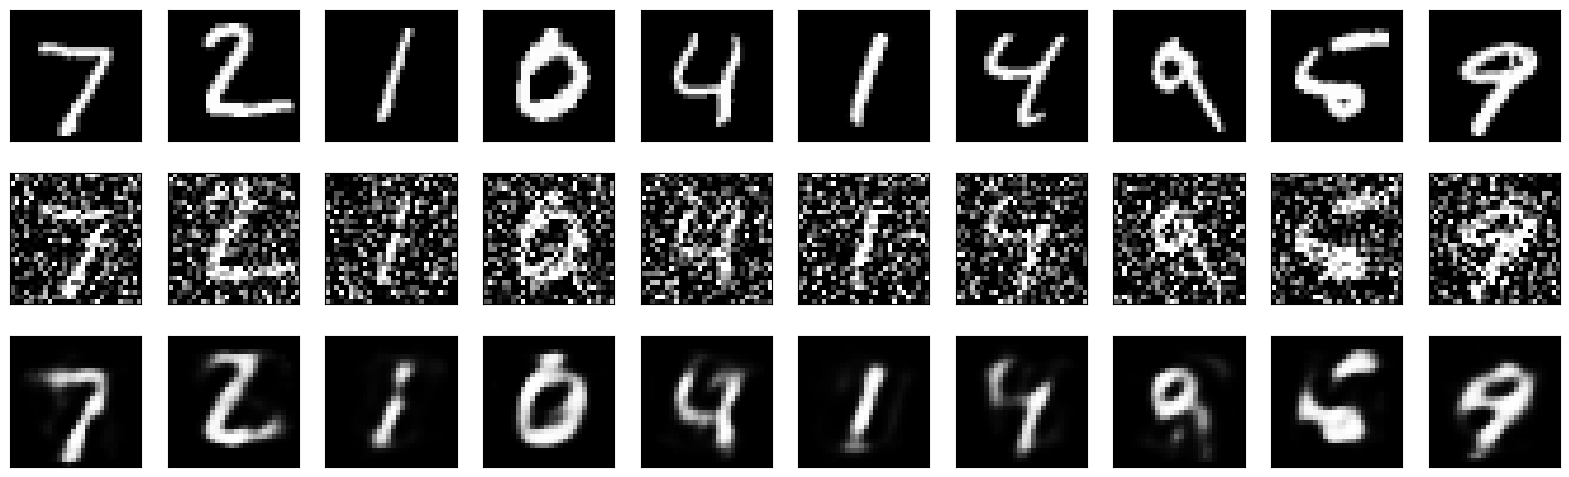

In [35]:
########################################
#                                      #
#       FILL THIS WITH CODE!           #
#                                      #
########################################

n = 10
plt.figure(figsize=(20, 6))

for i in range(n):

    # display original
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display noisy
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(3, n, i + 1 + 2*n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()